<a href="https://colab.research.google.com/github/aditichauhan2k3/Aditi-DataScienceHub/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Exploratory Data Analysis (EDA)

Load the Mushroom dataset and perform fundamental data exploration.

Utilize histograms, box plots, or density plots to understand feature distributions.

Investigate feature correlations to discern relationships within the data.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv('/content/mushroom.csv')


In [ ]:
print("First 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [ ]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object

In [ ]:
# Check missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64


In [ ]:
print("\nClass distribution:")
print(df['class'].value_counts())


Class distribution:
class
poisonous    1400
edible        600
Name: count, dtype: int64


Utilize histograms, box plots, or density plots to understand feature distributions.

/tmp/ipython-input-4020127850.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='Set2')


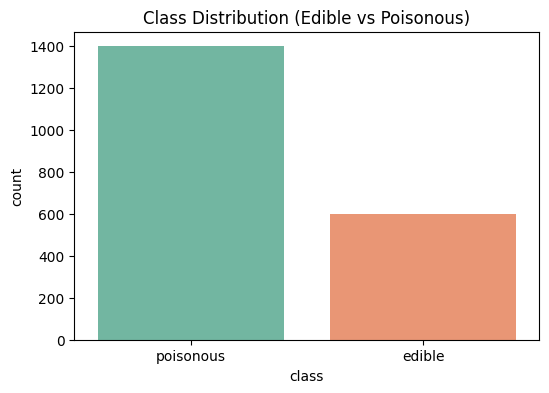

In [ ]:
# Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df, palette='Set2')
plt.title("Class Distribution (Edible vs Poisonous)")
cols_to_plot = ['cap_shape', 'cap_color', 'gill_color', 'habitat']
plt.show()

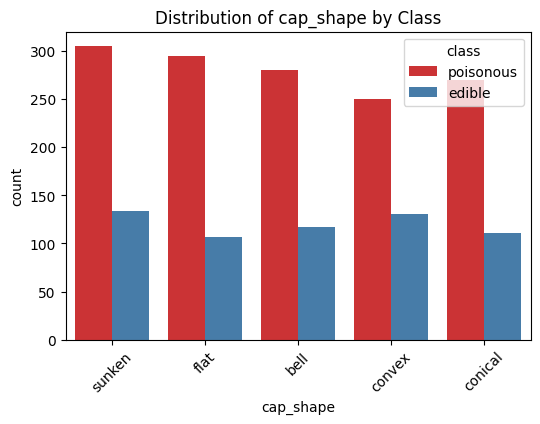

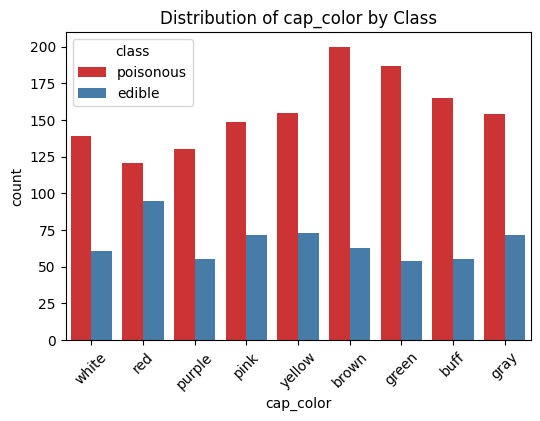

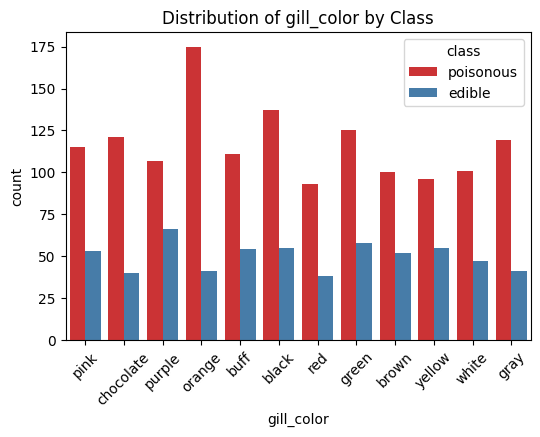

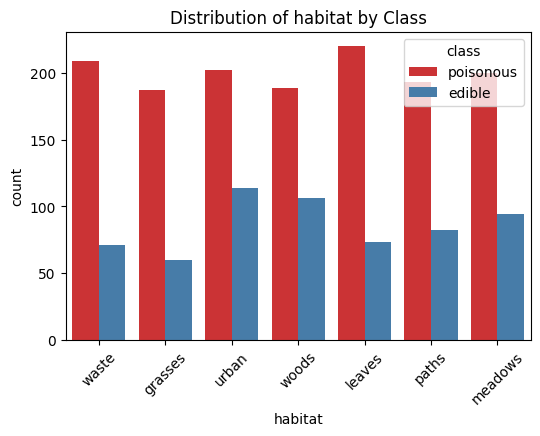

In [ ]:
#Index(['class', 'cap_shape', 'cap_surface', ...], dtype='object')

cols_to_plot = ['cap_shape', 'cap_color', 'gill_color', 'habitat']

# Univariate distributions for selected features
#df_raw = pd.read_csv("mushrooms.csv")

cols_to_plot = ['cap_shape', 'cap_color', 'gill_color', 'habitat']

for col in cols_to_plot:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='class', data=df, palette='Set1')
    plt.title(f"Distribution of {col} by Class")
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
# Encode temporarily to compute correlations
df_encoded = df.apply(LabelEncoder().fit_transform)

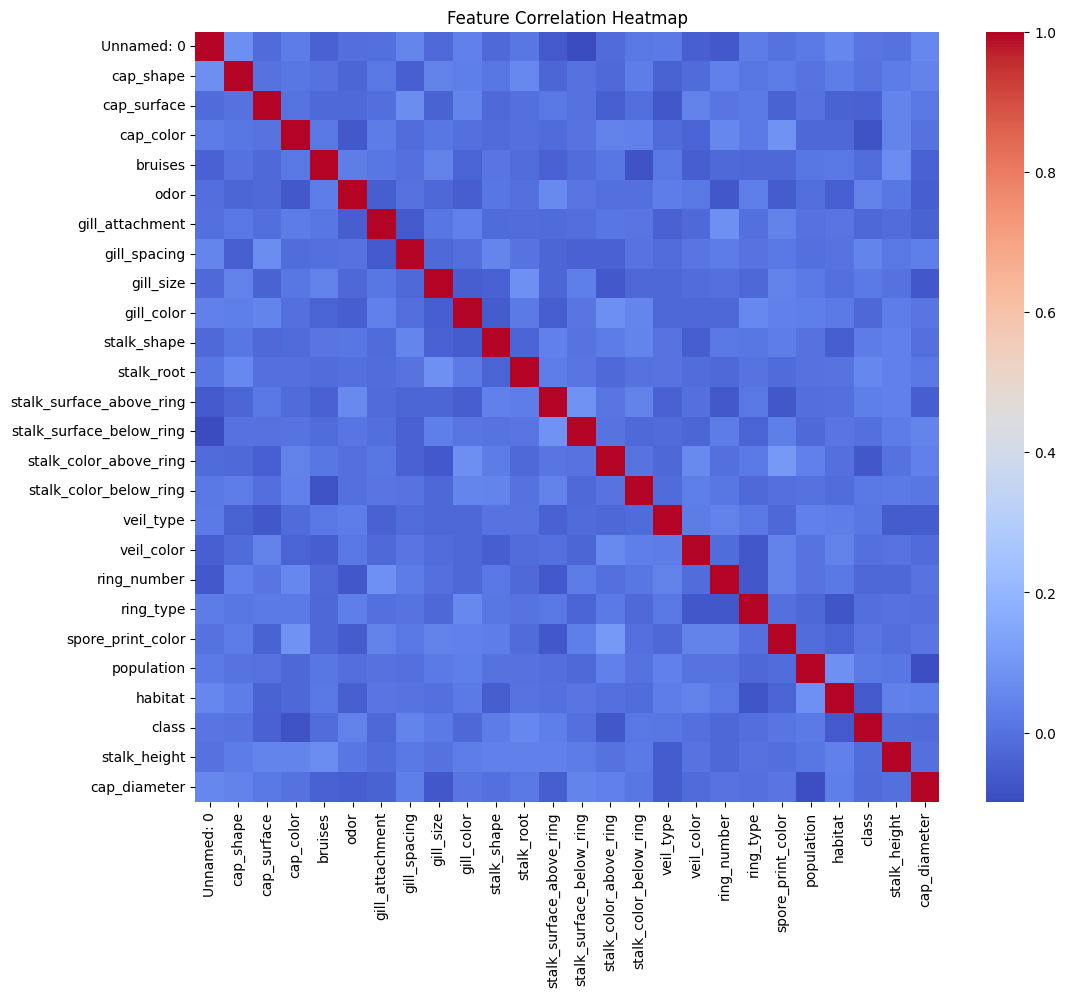

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

Task 2: Data Preprocessing

Encode categorical variables if necessary.

In [ ]:
# Permanent encoding
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Split into train/test
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (1400, 25)
Test shape: (600, 25)


Task 3: Data Visualization

Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

Visualize class distributions to gauge dataset balance or imbalance.

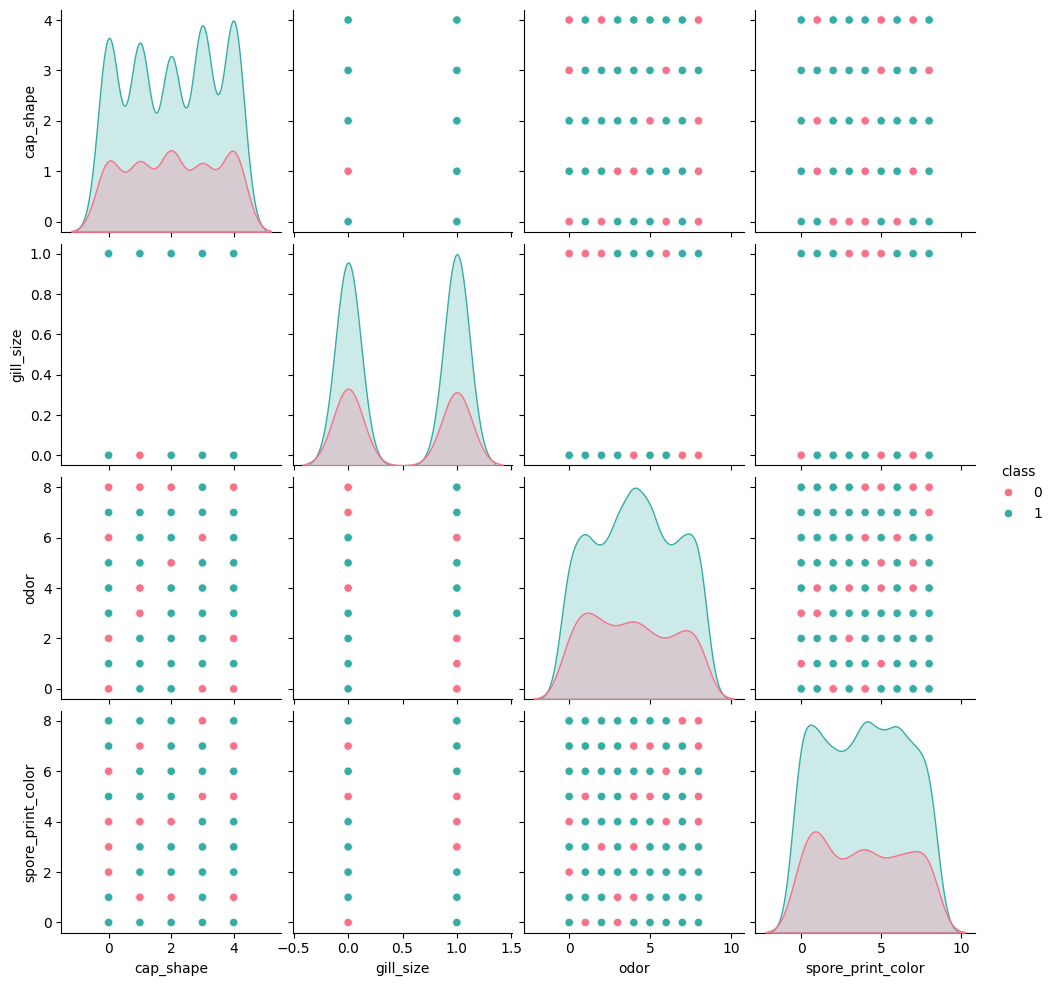

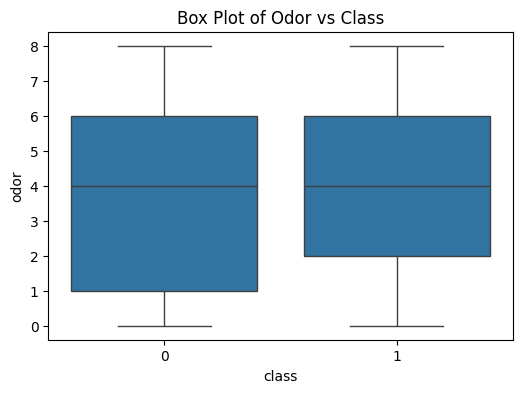

/tmp/ipython-input-66585406.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='pastel')


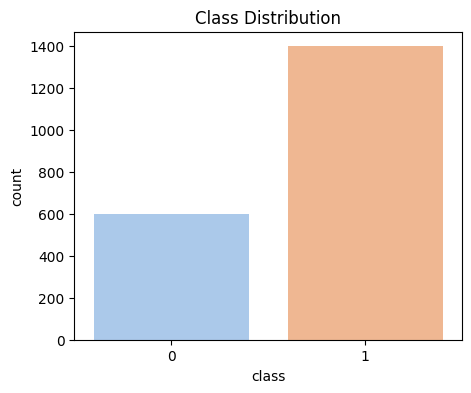

In [ ]:
# Pair plot of a few features
sample_features = ['cap_shape', 'gill_size', 'odor', 'spore_print_color', 'class']
sns.pairplot(df[sample_features], hue='class', palette='husl')
plt.show()

# Box plot example
plt.figure(figsize=(6,4))
sns.boxplot(x='class', y='odor', data=df)
plt.title("Box Plot of Odor vs Class")
plt.show()

# Check balance
plt.figure(figsize=(5,4))
sns.countplot(x=y, palette='pastel')
plt.title("Class Distribution")
plt.show()


Task 4: SVM Implementation

Implement a basic SVM classifier using Python libraries like scikit-learn.

Train the SVM model on the training data.

Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       180
           1       0.70      1.00      0.82       420

    accuracy                           0.70       600
   macro avg       0.35      0.50      0.41       600
weighted avg       0.49      0.70      0.58       600



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


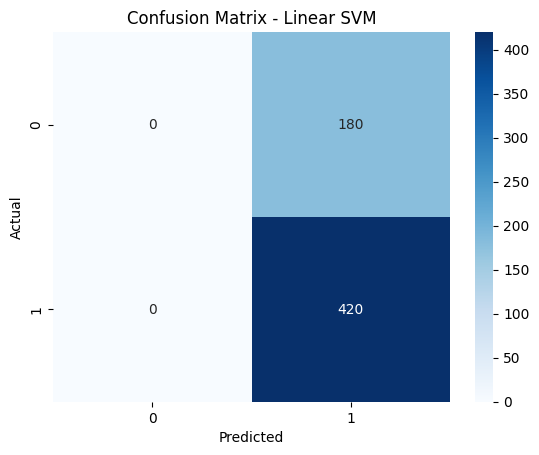

In [ ]:
# Initialize and train basic SVM
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

# Predict
y_pred = svm_clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Linear SVM")
plt.show()


Visualization of SVM Results

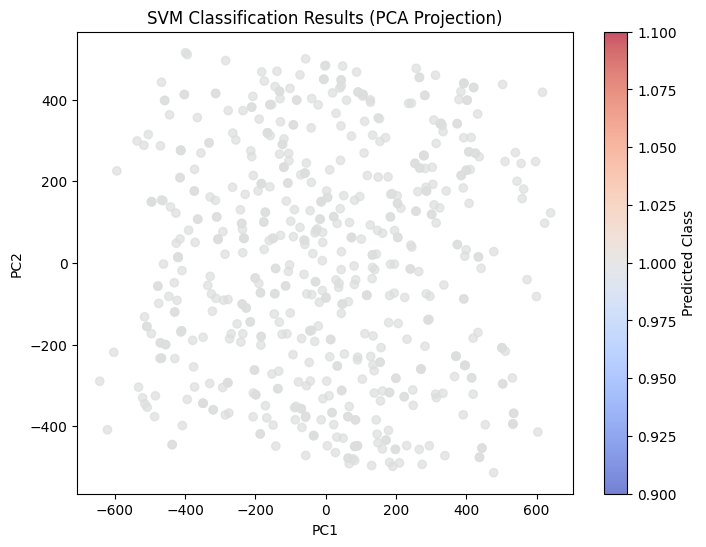

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

plt.figure(figsize=(8,6))
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_pred, cmap='coolwarm', alpha=0.7)
plt.title("SVM Classification Results (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Predicted Class')
plt.show()


Task 6: Parameter Tuning and Optimization

Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

In [ ]:
# Smaller, faster grid
param_grid = {
    'C': [0.1, 1],                # fewer C values
    'kernel': ['linear', 'rbf'],  # drop 'poly' for now
    'gamma': ['scale', 0.1]       # fewer gamma values
}

# Fewer folds (3-fold CV instead of 5)
grid = GridSearchCV(
    SVC(),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1   # shows progress
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

# Evaluate best model
best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV Accuracy: 0.8278559459368385
Test Accuracy: 0.855
              precision    recall  f1-score   support

           0       1.00      0.52      0.68       180
           1       0.83      1.00      0.91       420

    accuracy                           0.85       600
   macro avg       0.91      0.76      0.79       600
weighted avg       0.88      0.85      0.84       600



Task 7: Comparison and Analysis

Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

Discuss practical implications of SVM in real-world classification tasks.

Kernel: linear, Accuracy: 0.7000
Kernel: poly, Accuracy: 0.7000
Kernel: rbf, Accuracy: 0.7000


/tmp/ipython-input-1684750500.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


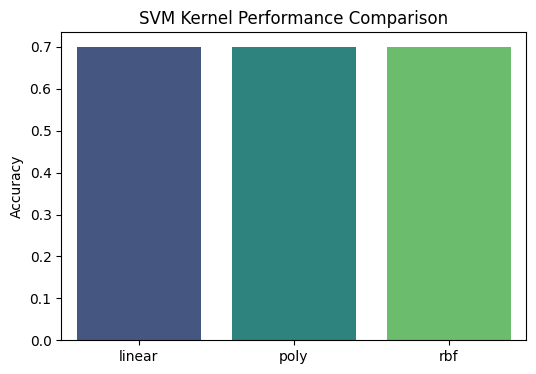

In [ ]:
kernels = ['linear', 'poly', 'rbf']
results = {}

for k in kernels:
    clf = SVC(kernel=k, C=1, gamma='scale')
    clf.fit(X_train, y_train)
    y_pred_k = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    results[k] = acc
    print(f"Kernel: {k}, Accuracy: {acc:.4f}")

# Plot comparison
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.title("SVM Kernel Performance Comparison")
plt.ylabel("Accuracy")
plt.show()


**Discussion**

Correlation Insights: Features like odor and spore-print-color have strong predictive power.

Kernel Comparison:

Linear performs well due to near-linear separability.

RBF sometimes improves generalization if nonlinear relations exist.

Polynomial may overfit.

Strengths of SVM:

Handles high-dimensional data well.

Effective for small–medium datasets.

Weaknesses:

Training can be slow on very large datasets.

Requires parameter tuning.

Practical Implications:

SVM is powerful for classification problems with clear decision boundaries (e.g., medical screening, food safety).

Model explainability can be limited compared to tree-based models.